In [1]:
from hossam import load_data, my_dpi

from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
origin=load_data('cars')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

자동차의 속도(speed)에 따른 제동거리(dist) 조사 데이터 (출처: R 기본 데이터)

field    description
-------  -------------
speed    속도
dist     제동거리


===== 데이터 크기 확인 =====
데이터셋 크기 : (50, 2)
행 개수 : 50개
열 개수 : 2개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   50 non-null     int64
 1   dist    50 non-null     int64
dtypes: int64(2)
memory usage: 932.0 bytes
None


,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [4]:
desc=origin.describe().T
desc

,count,mean,std,min,25%,50%,75%,max
speed,50.0,15.40,5.287644,4.0,12.0,15.0,19.0,25.0
dist,50.0,42.98,25.769377,2.0,26.0,36.0,56.0,120.0


In [5]:
desc['missing']=origin.isnull().sum()
desc

,count,mean,std,min,25%,50%,75%,max,missing
speed,50.0,15.40,5.287644,4.0,12.0,15.0,19.0,25.0,0
dist,50.0,42.98,25.769377,2.0,26.0,36.0,56.0,120.0,0


In [6]:
Q1=origin.quantile(0.25)
Q3=origin.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outlier_count=((origin<lower_bound) | (origin>upper_bound)).sum()
outlier_ratio=outlier_count/len(origin)*100
desc['outlier_count']=outlier_count
desc['outlier_ratio(%)']=outlier_ratio
desc

,count,mean,std,min,25%,50%,75%,max,missing,outlier_count,outlier_ratio(%)
speed,50.0,15.40,5.287644,4.0,12.0,15.0,19.0,25.0,0,0,0.0
dist,50.0,42.98,25.769377,2.0,26.0,36.0,56.0,120.0,0,1,2.0


In [7]:
skewness_result=[]

for column in origin.columns:
    skewness=origin[column].skew()
    if abs(skewness)<0.5:
        strength='week'
        log_transform='not needed'
    elif abs(skewness)<1:
        strength='normal'
        log_transform='recommended'
    else:
        strength='strong'
        log_transform='needed'
    
    desc.loc[column, 'skewness']=skewness
    desc.loc[column, 'skewness_strength']=strength
    desc.loc[column, 'log_transform']=log_transform

desc

,count,mean,std,min,25%,50%,75%,max,missing,outlier_count,outlier_ratio(%),skewness,skewness_strength,log_transform
speed,50.0,15.40,5.287644,4.0,12.0,15.0,19.0,25.0,0,0,0.0,-0.117510,week,not needed
dist,50.0,42.98,25.769377,2.0,26.0,36.0,56.0,120.0,0,1,2.0,0.806895,normal,recommended


In [8]:
df=origin.copy()
df['dist']=np.log1p(df['dist'])
df.head()

,speed,dist
0,4,1.098612
1,4,2.397895
2,7,1.609438
3,7,3.135494
4,8,2.833213


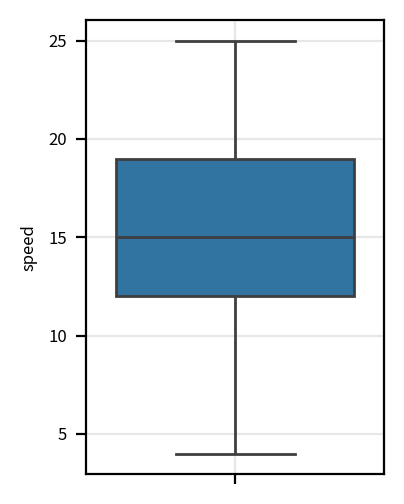

In [9]:
figsize=(400/my_dpi, 500/my_dpi)
fig, ax=plt.subplots(1, 1, figsize=figsize, dpi=my_dpi)

sb.boxplot(data=df, y='speed')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

In [10]:
x=df[['speed']]
x.head()

,speed
0,4
1,4
2,7
3,7
4,8


In [11]:
y=df['dist']
y.head()

0    1.098612
1    2.397895
2    1.609438
3    3.135494
4    2.833213
Name: dist, dtype: float64